In [27]:
# Path setup, imports, reproducibility
from pathlib import Path
import subprocess, os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

# Define a helper function to find the repository root

def get_repo_root():
    try:
        return Path(subprocess.check_output(["git", "rev-parse", "--show-toplevel"], text=True).strip())
    except Exception: # Fallback method (in case Git command fails)
        # Fallback: walk up to find .git or use current working directory
        p = Path.cwd()
        for _ in range(6):
            if (p / ".git").exists():
                return p
            p = p.parent
        return Path.cwd()

#Establish project root and fallback path
ROOT = get_repo_root()  #ROOT is the directory automatically detected.
# Fallback to confirmed hardcoded path if detection returns unexpected location
FALLBACK_ROOT = Path(r"C:\Users\rajni\Documents\breast-cancer-agentic")
# This part ensures pointing to the correct project if Git detection fails:
if ROOT != FALLBACK_ROOT and not (ROOT / "data" / "raw").exists():
    ROOT = FALLBACK_ROOT

# Print and define key project directories
print("Repo root:", ROOT)
DATA_RAW = ROOT / "data" / "raw"
DATA_ENGINEERED = ROOT / "data" / "engineered"
ARTIFACTS_ENG = ROOT / "artifacts" / "engineering"
ARTIFACTS_EDA = ROOT / "artifacts" / "eda_reports"

# Creates folders if missing, automatically makes sure the folders exist
for p in [DATA_ENGINEERED, ARTIFACTS_ENG, ARTIFACTS_EDA]:
    p.mkdir(parents=True, exist_ok=True)

# Set display and visualization preferences
pd.set_option('display.max_columns', 200)
sns.set(style='whitegrid')

# Define and validate your data source, points to data file, 
SRC_FILE = DATA_RAW / "breast_cancer_with_columns.csv"
print("Using source file:", SRC_FILE)
# Checks if it actually exists, otherwise throws a clear error
assert SRC_FILE.exists(), f"Missing source file: {SRC_FILE}"

# Explicitly declares which column in dataset is the target variable
TARGET_COL = "diagnosis"


Repo root: C:\Users\rajni\Documents\breast-cancer-agentic
Using source file: C:\Users\rajni\Documents\breast-cancer-agentic\data\raw\breast_cancer_with_columns.csv


In [28]:
# Load dataset and read the CSV file from the defined project path
df = pd.read_csv(SRC_FILE)
# # Show number of rows and columns
print("Loaded shape:", df.shape)

# Validate the target column
if TARGET_COL not in df.columns: # Ensure the expected target column exists in the dataset
    print("Columns available:", list(df.columns)[:40])
    raise AssertionError(f"Target column '{TARGET_COL}' not found in CSV")

# Split features (X) and target (y)
y = df[TARGET_COL  # select target column for prediction
X = df.drop(columns=[TARGET_COL])  # create feature set by dropping target column

# Quick class distribution check
print("Target distribution:")
print(y.value_counts(normalize=True))
display(df.head())
# Summary stats for numeric & categorical cols
display(df.describe(include='all').T)

print("Missing values (top 15):")
print(df.isna().sum().sort_values(ascending=False).head(15))


Loaded shape: (569, 32)
Target distribution:
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


Missing values (top 15):
id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
dtype: int64


Numeric columns count: 31


,col,n_missing,n_unique
25,smoothness_worst,0,411
9,symmetry_mean,0,432
1,radius_mean,0,456
21,radius_worst,0,457
5,smoothness_mean,0,474
2,texture_mean,0,479
28,concave points_worst,0,492
19,symmetry_se,0,498
10,fractal_dimension_mean,0,499
29,symmetry_worst,0,500


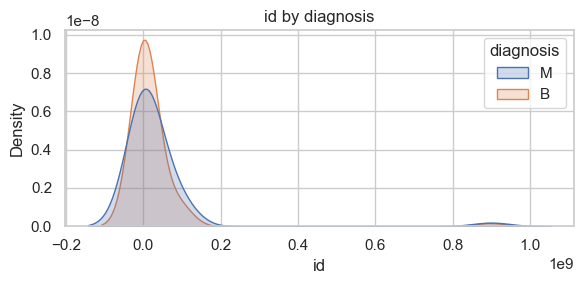

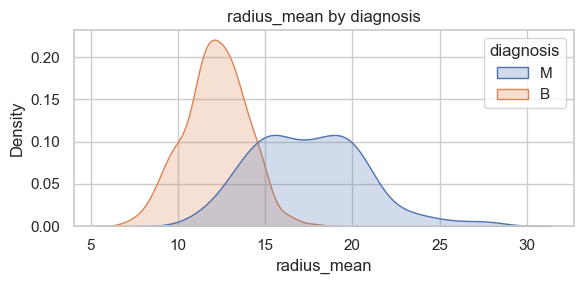

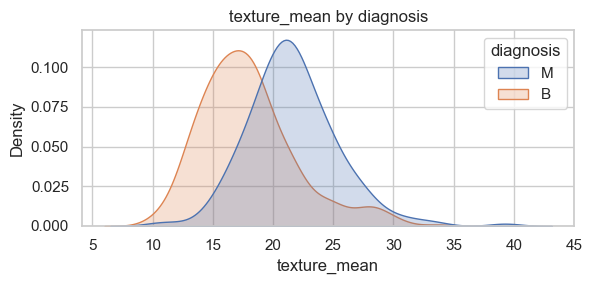

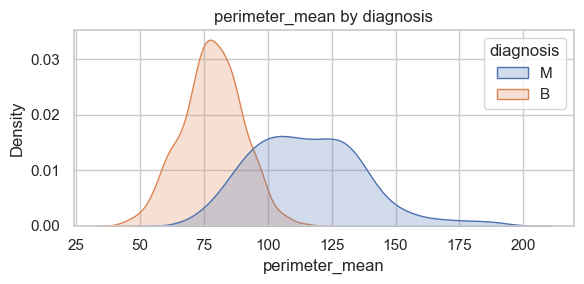

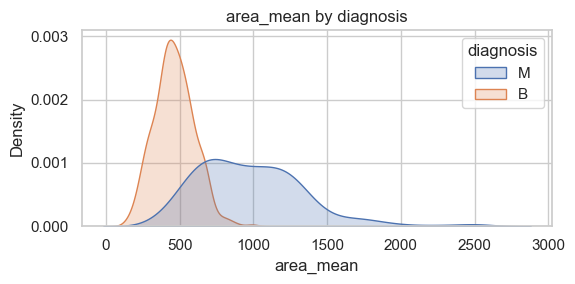

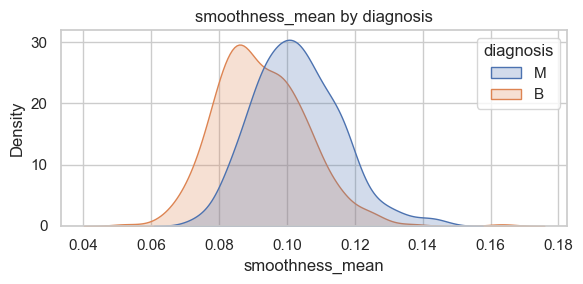

In [29]:
# Quick numeric overview and sample KDE plots
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
print("Numeric columns count:", len(num_cols))
display(pd.DataFrame({
    "col": num_cols,
    "n_missing": [X[c].isna().sum() for c in num_cols],
    "n_unique": [X[c].nunique() for c in num_cols],
}).sort_values(["n_missing", "n_unique"], ascending=[False, True]).head(20))

# Plot a few features
sel = num_cols[:6]
for col in sel:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=df, x=col, hue=TARGET_COL, fill=True, common_norm=False)
    plt.title(f'{col} by {TARGET_COL}')
    plt.tight_layout()
    plt.show()


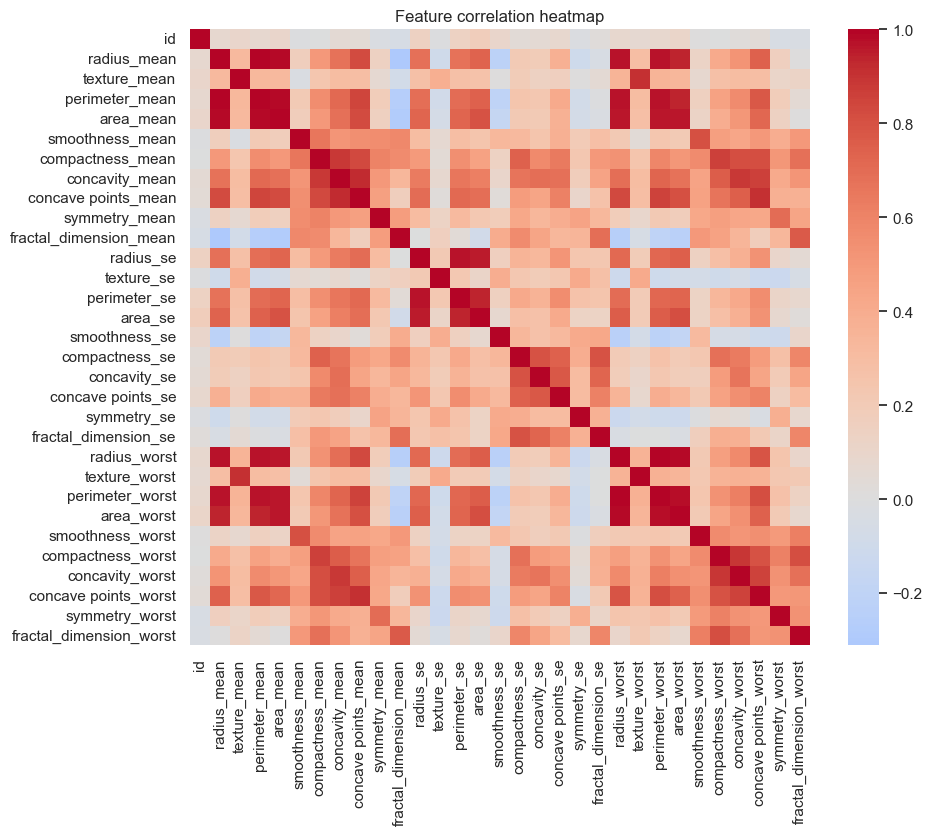

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
texture_worst           0.456903
smoothness_worst        0.421465
symmetry_worst          0.416294
texture_mean            0.415185
Name: diagnosis, dtype: float64

In [30]:
# Correlation heatmap 
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature correlation heatmap')
plt.show()

# Correlation with target: handle object target by mapping to binary
if y.dtype == 'O' or y.dtype.name == 'category':
    uniq = list(y.unique())
    if len(uniq) == 2:
        y_bin = y.map({uniq[0]: 0, uniq[1]: 1})
    else:
        # fallback: try common names
        y_bin = y.map(lambda v: 1 if str(v).lower().startswith('m') or str(v).lower().startswith('b') else 0)
else:
    y_bin = y

tmp = X.copy()
tmp[TARGET_COL] = y_bin.values
target_corr = tmp.corr()[TARGET_COL].abs().sort_values(ascending=False)
display(target_corr.head(20))


In [31]:
# ==== Agent loader + safe adapter (drop-in cell) ====
import sys, importlib.util, inspect
from pathlib import Path
import pandas as pd

# If these weren't defined earlier, set safe defaults here
try:
    ARTIFACTS_EDA
except NameError:
    ARTIFACTS_EDA = Path("artifacts/eda")
ARTIFACTS_EDA.mkdir(parents=True, exist_ok=True)

try:
    TARGET_COL
except NameError:
    TARGET_COL = "diagnosis"

# If not set, adapter will only use in-memory df.
DATA_PATH = globals().get("DATA_PATH", None)

# Resolve project root: adjust if your notebooks live in a subfolder
ROOT = Path.cwd().parents[0] if (Path.cwd().name == "notebooks") else Path.cwd()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

AGENTS_DIR = ROOT / "agents"
print("ROOT:", ROOT)
print("AGENTS_DIR:", AGENTS_DIR, "| exists:", AGENTS_DIR.exists())
print("__init__.py present:", (AGENTS_DIR / "__init__.py").exists())

AGENTS_AVAILABLE = False

def load_module_by_path(mod_name, path: Path):
    spec = importlib.util.spec_from_file_location(mod_name, str(path))
    mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(mod)
    return mod

# ---- Try to import real agents, otherwise fall back to stubs ----
try:
    # Package-style import (preferred if 'agents' is a package)
    from agents.eda_agent import run_eda_report  # expected callable
    from agents.fe_agent import propose_features, apply_features
    AGENTS_AVAILABLE = True
    print("Imported agents via package imports.")
except Exception as e_pkg:
    print("Package import failed:", e_pkg)
    try:
        # File-path import fallback
        eda_path = AGENTS_DIR / "eda_agent.py"
        fe_path  = AGENTS_DIR / "fe_agent.py"

        eda_mod = load_module_by_path("agents.eda_agent", eda_path)
        run_eda_report = getattr(eda_mod, "run_eda_report", None)

        fe_mod = load_module_by_path("agents.fe_agent", fe_path) if fe_path.exists() else None
        propose_features = getattr(fe_mod, "propose_features", None) if fe_mod else None
        apply_features   = getattr(fe_mod, "apply_features", None)   if fe_mod else None

        if callable(run_eda_report):
            AGENTS_AVAILABLE = True
            print("Loaded agents via file path.")
        else:
            raise ImportError("run_eda_report not found in eda_agent.py")
    except Exception as e_path:
        print("File-path import failed:", e_path)

        # ---- Safe stubs so the notebook can continue without breaking ----
        def run_eda_report(df, target_col=None, out_dir="artifacts/eda"):
            print("run_eda_report stub called — no real EDA performed.")
            return {"summary_path": None, "out_dir": out_dir}

        def propose_features(X, y=None, max_interactions=20):
            print("propose_features stub called.")
            return []

        def apply_features(X, proposals):
            print("apply_features stub called.")
            return X.copy(), {"applied": [], "count": 0}

        print("Using stubbed agent functions (no-op).")

# ---- Safe-call adapter: works with df-based or path-based agent signatures ----
def call_run_eda_safely(run_eda_report_fn, df, target_col, out_dir, data_path=None, **extra):
    """
    Calls run_eda_report whether it expects:
      - df=... (in-memory DataFrame), OR
      - dataset_path=... / path=... (file API), OR
      - positional (df, target_col, out_dir) / (path, target_col, out_dir).
    """
    if run_eda_report_fn is None or not callable(run_eda_report_fn):
        raise RuntimeError("run_eda_report is not callable; agent import failed.")

    params = inspect.signature(run_eda_report_fn).parameters
    kw = dict(target_col=target_col, out_dir=str(out_dir), **extra)

    # Case 1: explicit DataFrame argument
    if "df" in params:
        return run_eda_report_fn(df=df, **kw)

    # Case 2: explicit path argument
    if "dataset_path" in params or "path" in params:
        if data_path is None:
            raise ValueError("Agent expects a file path — set DATA_PATH before calling.")
        key = "dataset_path" if "dataset_path" in params else "path"
        kw[key] = data_path
        return run_eda_report_fn(**kw)

    # Case 3: positional fallbacks
    try:
        # Try df-first positional
        return run_eda_report_fn(df, target_col, str(out_dir), **extra)
    except TypeError:
        if data_path is None:
            raise
        # Try path-first positional
        return run_eda_report_fn(data_path, target_col, str(out_dir), **extra)

# ---- Execute via safe adapter (works for real agent or stub) ----
try:
    if "df" not in globals():
        raise NameError("df is not defined in this notebook cell scope.")
    result = call_run_eda_safely(
        run_eda_report_fn=run_eda_report,
        df=df,
        target_col=TARGET_COL,
        out_dir=ARTIFACTS_EDA,
        data_path=DATA_PATH  # ignored if agent uses df-based API
    )
    print("run_eda_report executed; artifacts (if any) saved to:", ARTIFACTS_EDA)
    if result is not None:
        try:
            print("Agent result keys:", list(result.keys()))
        except Exception:
            print("Agent result type:", type(result))
except Exception as e:
    print("run_eda_report execution failed:", e)


ROOT: C:\Users\rajni\Documents\breast-cancer-agentic
AGENTS_DIR: C:\Users\rajni\Documents\breast-cancer-agentic\agents | exists: True
__init__.py present: True
Imported agents via package imports.
run_eda_report executed; artifacts (if any) saved to: C:\Users\rajni\Documents\breast-cancer-agentic\artifacts\eda_reports
Agent result keys: ['summary_path', 'out_dir']


In [32]:
# Baseline feature engineering functions
import numpy as np

def add_ratio_features(df):
    df = df.copy()
    pairs = [
        ('radius_mean','radius_worst'),
        ('texture_mean','texture_worst'),
        ('perimeter_mean','perimeter_worst'),
        ('area_mean','area_worst'),
        ('smoothness_mean','smoothness_worst'),
        ('compactness_mean','compactness_worst'),
        ('concavity_mean','concavity_worst'),
        ('concave points_mean','concave points_worst'),
        ('symmetry_mean','symmetry_worst'),
        ('fractal_dimension_mean','fractal_dimension_worst'),
    ]
    for a, b in pairs:
        if a in df.columns and b in df.columns:
            with np.errstate(divide='ignore', invalid='ignore'):
                df[f'{b}_over_{a}'] = df[b] / df[a]
    return df

def drop_se_columns(df):
    return df.drop(columns=[c for c in df.columns if str(c).endswith('_se')], errors='ignore')

X_fe = add_ratio_features(X)
X_fe = drop_se_columns(X_fe)
print("Feature-engineered shape:", X_fe.shape)


Feature-engineered shape: (569, 31)


C:\Users\rajni\AppData\Local\Temp\ipykernel_50680\4023856114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='coolwarm')


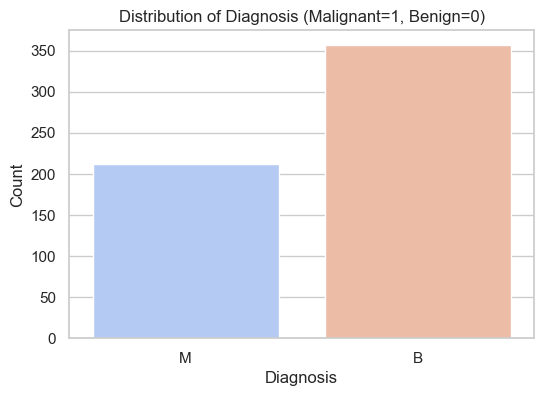

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title('Distribution of Diagnosis (Malignant=1, Benign=0)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [34]:
# Import agents from the root-level 'agents' package
import sys
from pathlib import Path

# Ensure repo root is on sys.path so 'agents' can be found from notebooks/
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

AGENTS_DIR = ROOT / "agents"
print("AGENTS_DIR:", AGENTS_DIR, "| exists:", AGENTS_DIR.exists())
print("__init__.py present:", (AGENTS_DIR / "__init__.py").exists())

AGENTS_AVAILABLE = False
try:
    from agents.eda_agent import run_eda_report
    from agents.fe_agent import propose_features, apply_features
    AGENTS_AVAILABLE = True
    print("Agents imported from:", AGENTS_DIR)
except Exception as e:
    print("Agents not available or failed to import.")
    print(" - Expected path:", AGENTS_DIR)
    print(" - Error:", e)

if AGENTS_AVAILABLE:
    try:
        run_eda_report(df=df, target_col=TARGET_COL, out_dir=str(ARTIFACTS_EDA))
        print("EDA agent report saved to:", ARTIFACTS_EDA)
    except Exception as e:
        print("EDA agent run failed:", e)




AGENTS_DIR: C:\Users\rajni\Documents\breast-cancer-agentic\agents | exists: True
__init__.py present: True
Agents imported from: C:\Users\rajni\Documents\breast-cancer-agentic\agents
EDA agent report saved to: C:\Users\rajni\Documents\breast-cancer-agentic\artifacts\eda_reports


In [35]:
from datetime import datetime

lower_pct, upper_pct = 0.01, 0.99
clip_lower = {}
clip_upper = {}
for col in X_fe.select_dtypes(include=[np.number]).columns:
    clip_lower[col] = float(X_fe[col].quantile(lower_pct))
    clip_upper[col] = float(X_fe[col].quantile(upper_pct))

fe_metadata = {
    "created_at": datetime.utcnow().isoformat() + "Z",
    "clip_percentiles": {"lower": lower_pct, "upper": upper_pct},
    "clip_bounds": {"lower": clip_lower, "upper": clip_upper},
    "feature_columns": list(X_scaled.columns),
    "transform": "cap_percentiles + StandardScaler"
}

joblib.dump({'scaler': scaler, 'columns': list(X_scaled.columns), 'fe_metadata': fe_metadata},
            ARTIFACTS_ENG / 'transformers.pkl')


C:\Users\rajni\AppData\Local\Temp\ipykernel_50680\3522764467.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "created_at": datetime.utcnow().isoformat() + "Z",


['C:\\Users\\rajni\\Documents\\breast-cancer-agentic\\artifacts\\engineering\\transformers.pkl']

In [36]:
from sklearn.preprocessing import StandardScaler
import joblib

def cap_percentiles(df, lower=0.01, upper=0.99):
    df = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        lo = df[col].quantile(lower)
        hi = df[col].quantile(upper)
        df[col] = df[col].clip(lo, hi)
    return df

X_cap = cap_percentiles(X_fe)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_cap), columns=X_cap.columns)

out_df = X_scaled.copy()
out_df[TARGET_COL] = y.values

ENGINEERED_PATH = DATA_ENGINEERED / "breast_cancer_engineered.csv"
out_df.to_csv(ENGINEERED_PATH, index=False)
joblib.dump({'scaler': scaler, 'columns': list(X_fe.columns), 'fe_metadata': fe_metadata}, ARTIFACTS_ENG / 'transformers.pkl')

print("Saved engineered data to:", ENGINEERED_PATH)
print("Saved transformers to:", ARTIFACTS_ENG / "transformers.pkl")


Saved engineered data to: C:\Users\rajni\Documents\breast-cancer-agentic\data\engineered\breast_cancer_engineered.csv
Saved transformers to: C:\Users\rajni\Documents\breast-cancer-agentic\artifacts\engineering\transformers.pkl


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

# Impute missing values with column mean
imp = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imp.fit_transform(X_scaled),
                         columns=X_scaled.columns, index=X_scaled.index)

# Select correct target (y_bin if present else y)
target = y_bin if 'y_bin' in locals() else y

# Compute mutual information
mi = mutual_info_classif(X_imputed, target, random_state=RANDOM_STATE)
mi_series = pd.Series(mi, index=X_imputed.columns).sort_values(ascending=False)

# Save ranking
mi_series.to_csv(ARTIFACTS_EDA / "mutual_info_ranking.csv")
print("Saved mutual info ranking to:", ARTIFACTS_EDA / "mutual_info_ranking.csv")

Saved mutual info ranking to: C:\Users\rajni\Documents\breast-cancer-agentic\artifacts\eda_reports\mutual_info_ranking.csv


In [38]:
# artifacts dir 
ARTIFACTS_EDA = Path("artifacts/eda")
ARTIFACTS_EDA.mkdir(parents=True, exist_ok=True)

# Impute + MI
imp = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imp.fit_transform(X_scaled), columns=X_scaled.columns, index=X_scaled.index)

target = y_bin if 'y_bin' in locals() else y

mi = mutual_info_classif(X_imputed, target, random_state=42)
mi_series = pd.Series(mi, index=X_imputed.columns).sort_values(ascending=False)

# Save artifact
mi_csv_path = ARTIFACTS_EDA / "mutual_info_ranking.csv"
mi_series.to_csv(mi_csv_path)
print("Saved:", mi_csv_path)

mi_series.head(10)


Saved: artifacts\eda\mutual_info_ranking.csv


perimeter_worst                  0.475499
area_worst                       0.462673
radius_worst                     0.453255
concave points_mean              0.439841
concave points_worst             0.434507
perimeter_mean                   0.404176
concavity_mean                   0.372995
radius_mean                      0.366520
area_mean                        0.359182
radius_worst_over_radius_mean    0.319619
dtype: float64